In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
from tqdm import tqdm
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [81]:
pd.set_option('display.float_format', lambda x: '%0.6f' % x)

In [74]:
model1 = load_model("../models/model1/model1.h5")

In [13]:
def classify_driver(img_path, model):
    img = image.load_img(img_path, target_size=(256, 192))
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    prediction = model.predict(img_preprocessed)
    return prediction
#     print(decode_predictions(prediction, top=3)[0])

In [82]:
prediction = classify_driver("../data/raw_data/imgs/test/img_2.jpg", model1)
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


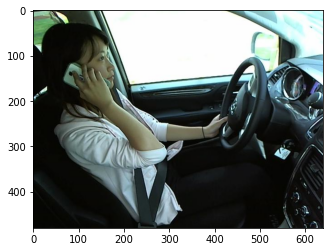

In [79]:
img = plt.imread("../data/raw_data/imgs/test/img_2.jpg")
plt.imshow(img)

In [60]:
def make_pred(model):
    predictions = []
    for filepath in tqdm(glob.iglob('../data/raw_data/imgs/small_test/*.jpg')):
        row = classify_driver(filepath, model)
        file_name = filepath.split("\\")[-1]
        row = list(row[0])
        row.insert(0, file_name)
        predictions.append(row)
    return predictions

In [83]:
predictions1 = make_pred(model1)
pred_df1 = pd.DataFrame (predictions1, columns = ['img', 'c0', 'c1', 'c2','c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

113it [00:07, 15.00it/s]


In [ ]:
'''
The 10 classes to predict are:

c0: normal driving
c1: texting - right
c2: talking on the phone - right
c3: texting - left
c4: talking on the phone - left
c5: operating the radio
c6: drinking
c7: reaching behind
c8: hair and makeup
c9: talking to passenger
'''

In [84]:
pred_df1.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,img_10.jpg,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,img_100.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,img_101.jpg,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,img_103.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [64]:
predictions2 = make_pred(model2)
pred_df2 = pd.DataFrame (predictions2, columns = ['img', 'c0', 'c1', 'c2','c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

113it [00:13,  8.17it/s]


In [70]:
pred_df2.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,img_10.jpg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,img_100.jpg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,img_101.jpg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
4,img_103.jpg,0.0000,0.0000,0.0000,0.0000,0.0000,0.0155,0.0000,0.0012,0.9833,0.0000
